# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [53]:
#%%pycodestyle
from scipy.spatial.distance import cdist


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def kmeans_pp(self, X, y=None):
        self.centroids[0] = X[np.random.randint(0, X.shape[0], size=None)]
        centroid_ids = np.zeros(self.k, dtype=int)
        for i in range(1, 1 + self.k):
            pair_d = cdist(X, self.centroids[:i])
            nearest_centroid_ids = np.argmin(pair_d, axis=1)
            nearest_centroid_dists = np.amin(pair_d, axis=1)
            dists_cumsum = np.cumsum(nearest_centroid_dists)
            sum_value = np.random.rand(1)[0] * dists_cumsum[-1]
            centroid_ids[i-1] = np.argmax(dists_cumsum[
                                        dists_cumsum >= sum_value])
        self.centroids = X[centroid_ids]
        self.labels = np.random.randint(low=0, high=self.k, size=X.shape[0])
        self.labels[centroid_ids] = np.arange(self.k)

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        # ...
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
            self.labels = np.random.randint(low=0,
                                            high=self.k, size=X.shape[0])
        elif self.init == 'k-means':
            self.kmeans_pp(X)
        else:
            raise Exception('Wrong method')
        centroids = np.ones((self.k, X.shape[1]))
        for i in range(self.max_iter):
            pair_d = cdist(X, self.centroids)
            self.labels = np.argmin(pair_d, axis=1)

            for i in range(self.k):
                mean_matrix = X[self.labels == i, :]
                if mean_matrix.shape[0] > 0:
                    self.centroids[i, :] = np.mean(X[self.labels == i, :],
                                                   axis=0)
            if np.allclose(centroids, self.centroids):
                break
            centroids = np.copy(self.centroids)

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        pair_d = cdist(X, self.centroids)
        labels = np.argmin(pair_d, axis=1)

        return labels


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, batch_size=10, eps = 1e-1,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        self.batch_size = batch_size
        self.eps = eps

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
            self.labels = np.random.randint(low=0, high=self.k,
                                            size=X.shape[0])
        elif self.init == 'k-means':
            self.kmeans_pp(X)
        else:
            raise Exception('Wrong method')

        v = np.zeros(self.k)
        centroids = np.ones((self.k, X.shape[1]))
        for iteration in range(self.max_iter):
            M = X[np.random.choice(X.shape[0],
                                   self.batch_size,
                                   replace=False)]
            pair_d = cdist(M, self.centroids)
            nearest_centoids_ids = np.argmin(pair_d, axis=1)

            for i, x in enumerate(M):
                v[nearest_centoids_ids[i]] += 1
                eta = 1 / v[nearest_centoids_ids[i]]
                self.centroids[nearest_centoids_ids[i]] =\
                    (1 - eta) * self.centroids[nearest_centoids_ids[i]] +\
                    eta * x

            if np.linalg.norm(centroids - self.centroids) < self.eps:
                break
            centroids = np.copy(self.centroids)

        pair_d = cdist(X, self.centroids)
        self.labels = np.argmin(pair_d, axis=1)

        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [54]:
from sklearn.datasets import make_blobs

In [55]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

In [56]:
n_clusters = 3

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

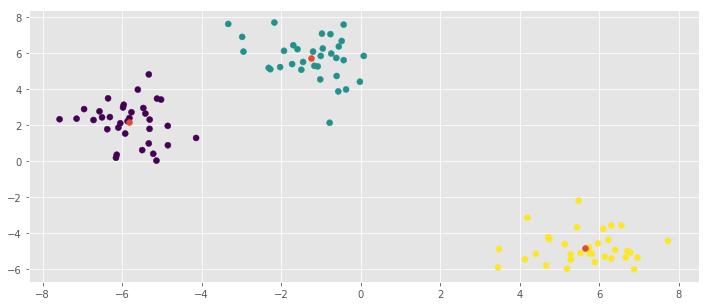

In [57]:
## Работоспособность MyKmeans
clf = MyKmeans(k=n_clusters, max_iter=1000)
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

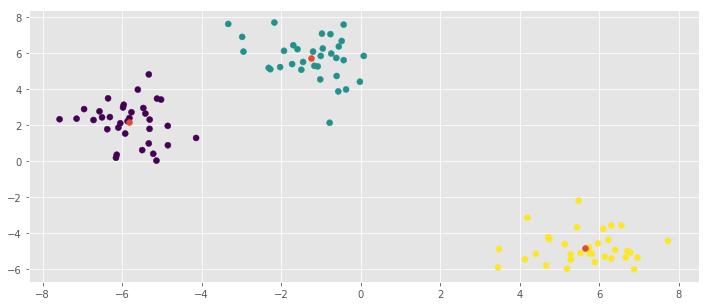

In [59]:
## Работоспособность MyKmeans++
clf = MyKmeans(k=n_clusters, max_iter=1000, init = 'k-means')
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

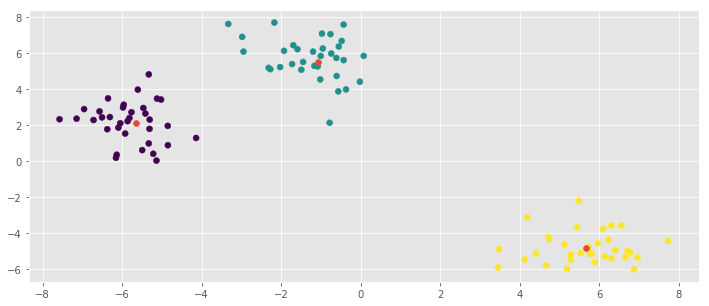

In [66]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=n_clusters, max_iter=2000)
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

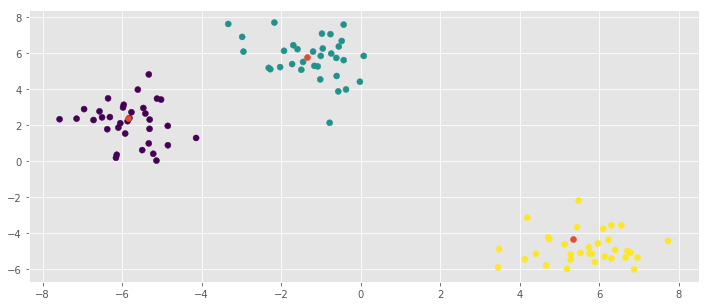

In [69]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=n_clusters, max_iter=1000, init='k-means')
clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])

In [13]:
## Время выполнения алгоритма Kmeans из sklearn

In [70]:
from sklearn.cluster import KMeans

In [71]:
%%timeit 
clf = KMeans(n_clusters, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 10.4 ms per loop


In [72]:
## Время выполнения алгоритма MyKmeans

In [73]:
%%timeit 
clf = MyKmeans(k=n_clusters, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 5.32 ms per loop


In [18]:
## Время выполнения алгоритма MyKmeans++

In [74]:
%%timeit 
clf = MyKmeans(k=n_clusters, max_iter=1000, init='k-means')
clf.fit(X)

100 loops, best of 3: 5.38 ms per loop


In [75]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

In [76]:
%%timeit 
clf = MiniBatchKMeans(k=n_clusters, max_iter=1000)
clf.fit(X)

100 loops, best of 3: 6.4 ms per loop


In [77]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

In [78]:
%%timeit 
clf = MiniBatchKMeans(k=n_clusters, max_iter=1000, init='k-means')
clf.fit(X)

100 loops, best of 3: 6.76 ms per loop


### Рисуем графики

In [79]:
def fit_model(clf):
    clf.fit(X)

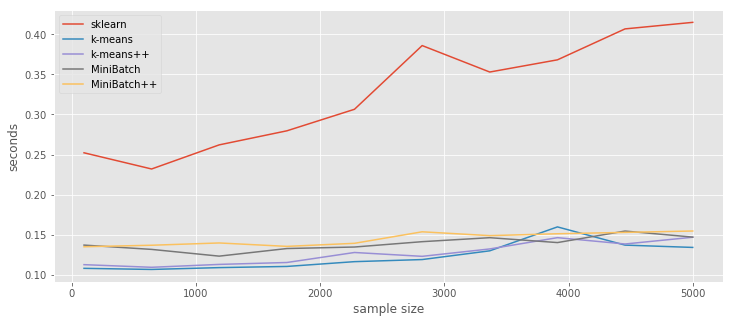

In [36]:
import timeit, functools

sample_sizes = np.linspace(100, 5000, 10, dtype=int)
clf_names = ['sklearn', 'k-means', 'k-means++', 'MiniBatch', 'MiniBatch++']
n_clusters = 3

clf = dict()
clf['sklearn'] = KMeans(n_clusters=n_clusters)
clf['k-means'] = MyKmeans(k=n_clusters)
clf['k-means++'] = MyKmeans(k=n_clusters, init='k-means')
clf['MiniBatch'] = MiniBatchKMeans(k=n_clusters)
clf['MiniBatch++'] = MiniBatchKMeans(k=n_clusters, init='k-means')

time = dict()
for clf_name in clf_names:
    time[clf_name] = list()

timeit_launch = 20

for n_samples in sample_sizes:
    X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
               center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    
    for clf_name in clf_names:
        t = timeit.Timer(functools.partial(fit_model, clf[clf_name])) 
        time[clf_name].append(t.timeit(timeit_launch))
    
for clf_name in clf_names:
    plt.plot(sample_sizes, time[clf_name], label=clf_name)

plt.xlabel('sample size')
plt.ylabel('seconds')
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [667]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

Дропаем ненужные столбцы и нормализуем данные

In [668]:
n_clusters=9
top_n = 5
df_sns = df_sns.drop(df_sns.columns[:4], axis=1)
df_sns = (df_sns - df_sns.mean(axis=0)) / df_sns.std(axis=0)

In [771]:
def cluster(clf):
    clf.fit(df_sns.values)
    labeled_sns = df_sns
    labeled_sns.loc[:, 'label'] = clf.predict(df_sns.values)
    
    for (c, group) in labeled_sns.groupby('label'):
        print('Cluster: %d' % c)
        print('Size: %d' % len(group))
        print(group.iloc[:,:-1].mean().nlargest(top_n))
        print("=" * 10 + '\n')

In [671]:
## MyKMeans

In [712]:
%time
cluster(MyKmeans(k=n_clusters))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs
Cluster: 0
Size: 833
hollister      4.170777
abercrombie    4.003862
shopping       0.778816
mall           0.587705
clothes        0.564629
dtype: float64

Cluster: 1
Size: 4105
shopping    0.887111
cute        0.740624
mall        0.702889
dress       0.667493
dance       0.658728
dtype: float64

Cluster: 2
Size: 1823
football      1.926374
baseball      1.647246
basketball    1.444906
sports        1.067609
tennis        0.723448
dtype: float64

Cluster: 3
Size: 465
kissed     5.408717
hair       3.183832
sex        3.010224
rock       2.014633
clothes    1.860733
dtype: float64

Cluster: 4
Size: 592
marching    5.248158
band        4.092632
music       0.502026
rock        0.164016
god         0.082424
dtype: float64

Cluster: 5
Size: 1767
soccer        1.854940
softball      1.407860
sexy          1.127663
drunk         0.756555
volleyball    0.275106
dtype: float64

Cluster: 6
Size: 536
drugs    4.787311
die      

Охарактеризуем деление:

Cluster: 0 -- любители шопинга 

Cluster: 1 -- тоже любители шопинга

Cluster: 2 -- любители спорта

Cluster: 3 -- тусовщики

Cluster: 4 -- уличные музыканты

Cluster: 5 -- фанаты 

Cluster: 6 -- суицидально ориентированные наркоманы-алкоголики

Cluster: 7 -- слишком большой кластер

Cluster: 8 -- черлидеры

In [ ]:
## MyKMeans++

In [717]:
%time
cluster(MyKmeans(k=n_clusters, init='k-means'))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
Cluster: 0
Size: 4772
shopping       0.903289
mall           0.710463
cute           0.694726
hollister      0.665081
abercrombie    0.609302
dtype: float64

Cluster: 1
Size: 1127
drunk    2.271745
sexy     1.903045
drugs    1.799914
die      0.844692
hair     0.699668
dtype: float64

Cluster: 2
Size: 545
kissed     5.082173
sex        3.150167
hair       3.034326
drugs      1.959882
clothes    1.793818
dtype: float64

Cluster: 3
Size: 2258
football      1.300504
marching      1.274700
band          1.032572
basketball    1.024398
softball      1.018412
dtype: float64

Cluster: 4
Size: 231
bible     6.961096
jesus     4.622239
god       4.342829
church    2.230210
death     0.452053
dtype: float64

Cluster: 5
Size: 19351
blonde     -0.029624
swimming   -0.037561
bible      -0.070155
tennis     -0.075371
jesus      -0.077163
dtype: float64

Cluster: 6
Size: 632
cheerleading    5.477811
shopping        0.486887
football 

Cluster: 0 -- любители шоппинга

Cluster: 1 -- тусовщики

Cluster: 2 -- любители поцелуев, секса и наркотиков

Cluster: 3 -- любители спорта

Cluster: 4 -- религиозные люди

Cluster: 5 -- большой кластер (неинтерпретируемый)

Cluster: 6 -- любители черлидинга

Cluster: 7 -- любители спортивных игр(особенно бейсбола)

Cluster: 8 -- любители спортивных игр(особенно футбола)

In [ ]:
## MyKMeans с MiniBatchMyKMeans

In [724]:
%time
cluster(MiniBatchKMeans(k=n_clusters))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Cluster: 0
Size: 257
bible     5.923082
tennis    4.392293
jesus     2.416058
church    2.151767
god       1.443815
dtype: float64

Cluster: 1
Size: 711
abercrombie    4.093401
hollister      3.529867
clothes        1.456393
shopping       1.095090
drugs          0.899726
dtype: float64

Cluster: 2
Size: 53
death       8.550505
die         6.049748
marching    5.642041
band        4.774739
god         1.212781
dtype: float64

Cluster: 3
Size: 736
kissed    3.705378
hair      3.161739
drugs     2.070441
sex       2.042429
drunk     1.699563
dtype: float64

Cluster: 4
Size: 23611
marching   -0.009236
blonde     -0.023439
band       -0.042621
sexy       -0.044411
swimming   -0.046804
dtype: float64

Cluster: 5
Size: 506
soccer        5.609112
hot           1.022656
sports        0.327969
shopping      0.290232
basketball    0.274396
dtype: float64

Cluster: 6
Size: 786
dress       4.330501
shopping    0.863307
cute       

Cluster: 0 -- религиозные люди

Cluster: 1 -- любители одежды

Cluster: 2 -- тематика смерти

Cluster: 3 -- любители поцелуев, секса и наркотиков

Cluster: 4 -- большой неинтерпретируемый кластер

Cluster: 5 -- любители спорта

Cluster: 6 -- любители одежды

Cluster: 7 -- любители спорта

Cluster: 8 -- любители рок-музыки

In [627]:
## MyKMeans++ с MiniBatchMyKMeans

In [770]:
%time
cluster(MiniBatchKMeans(k=n_clusters, init='k-means'))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
Cluster: 0
Size: 134
sex       6.695077
kissed    6.024374
drugs     5.397463
hair      4.406935
drunk     3.575220
dtype: float64

Cluster: 1
Size: 1850
football      2.117576
basketball    1.876413
volleyball    0.480789
sports        0.344305
softball      0.310408
dtype: float64

Cluster: 2
Size: 868
marching    4.573770
band        3.044927
music       0.495431
rock        0.210763
god         0.167352
dtype: float64

Cluster: 3
Size: 25031
blonde         -0.017841
tennis         -0.019478
sexy           -0.020601
bible          -0.021473
cheerleading   -0.021527
dtype: float64

Cluster: 4
Size: 37
die        14.462587
death       2.337253
god         1.605330
jesus       0.736577
clothes     0.715103
dtype: float64

Cluster: 5
Size: 316
church        6.084468
jesus         1.608023
god           1.521854
bible         1.179236
volleyball    0.567544
dtype: float64

Cluster: 6
Size: 600
mall        3.889238
shoppi

Cluster: 0 -- любители секса, поцелуев и наркотиков

Cluster: 1 -- любители спорта

Cluster: 2 -- уличные музыканты

Cluster: 3 -- большой неинтерпретируемый кластер

Cluster: 4 -- тематика смерти

Cluster: 5 -- любители спорта

Cluster: 6 -- любители шоппинга

Cluster: 7 -- любители одежды

Cluster: 8 -- любители спорта

## Вывод

Разные модели выделяли разные кластеры. Есть общие закономерности: например, везде есть любители шоппинга(одежды), спорта. Однако не все модели выделяли религиозный кластер. Почти все(кроме MyKmeans) выделили "любителей секса, поцелуев и наркотиков" (вместо них в MyKmeans тусовщики), однако только KMeans и MiniBatch++ выделили уличных музыкантов. Везде в той или иной форме присутствует тематика смерти и большой неинтерпретируемый кластер. Модели распределяли в несколько кластеров любителей спорта, причём ярко выделила футболистов и бейсболистов только одна(MyKmeans++). Некоторые модели выделили черлидеров и любителей рок-музыки

Каждая модель выделила что-нибудь уникальное, все кластеризации неплохо интерпретируемы, поэтому я лучшей модели в данном случае выделить не могу (плюс ко всему, работают модели практически одинаково быстро).

Объяснение явления понятно: модели имеют разные алгоритмы кластеризации. Всё сильно зависит от выбора начальных точек, а MiniBatch вообще использует градиентный спуск. Разных кластеризаций на сгенерированных данных не наблюдалось из-за "игрушечности" последних.